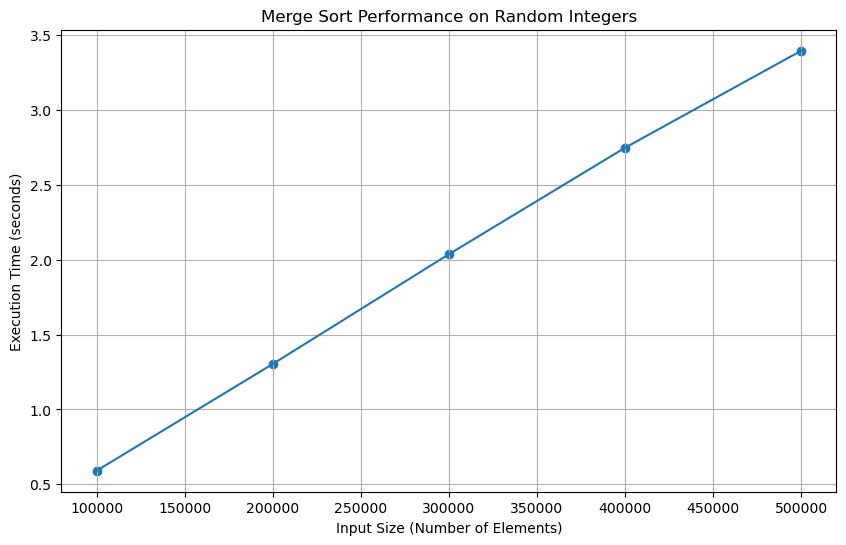

In [1]:
from random import randint
from time import process_time
import matplotlib.pyplot as plt

# merge two sorted lists into one sorted list
def merge(l, r):
    i = 0
    j = 0
    result = []
    # loops until all elements from both lists are merged
    while len(result) < len(r) + len(l):
        if l[i] < r[j]:
            result.append(l[i])
            i += 1
        else:
            result.append(r[j])
            j += 1
        # when one list is exhuasted, append the rest of the other list
        if i == len(l) or j == len(r):
            result.extend(l[i:] or r[j:])
            break
    return result

# bottom up merge sort function
def mergesort(arr):
    # initial subarray size to merge
    subarray_size = 1
    left_index = 0 
    while subarray_size < len(arr):
        while left_index + subarray_size < len(arr):
            right_index = left_index + subarray_size
            next_subarray = min(left_index + subarray_size * 2, len(arr))
            # merge and replace the relevant slice
            arr[left_index:next_subarray] = merge(
                arr[left_index:right_index],
                arr[right_index:next_subarray]
            )
            left_index = next_subarray
        subarray_size *= 2
        left_index = 0
    return arr

# create a sample list of 500,000 random integers between 1 and 10,000
sample = [randint(1, 10000) for _ in range(500000)]

# time the merge sort execution
start_time = process_time()
mergesort(sample)
end_time = process_time()
clock = end_time - start_time

# dictionary of recorded execution times for different input sizes
timer_dict = {
    100000: 0.591,
    200000: 1.304,
    300000: 2.037,
    400000: 2.748,
    500000: 3.396
}

# plot the merge sort performance
plt.figure(figsize=(10, 6))
plt.scatter(list(timer_dict.keys()), list(timer_dict.values()), marker='o')
plt.plot(list(timer_dict.keys()), list(timer_dict.values()), linestyle='-')
plt.xlabel("Input Size (Number of Elements)")
plt.ylabel("Execution Time (seconds)")
plt.title("Merge Sort Performance on Random Integers")
plt.grid(True)
plt.show()

